# <u>**PHASE TWO PROJECT.**<u>

# <u>**REAL-TIME ANALYSIS OF TOP-PERFOMING BOX OFFICE MOVIES.**<u>

## **1. <u>BUSINESS UNDERSTANDING<U>**

The main aim of this project is to assist a film company that has recently ventured in the film business, navigate the production industry by perfoming in-depth analysis on movie data to potentially uncover genre of movies that are perfoming well overall. The company has opened a new movie studio which they believe will help boost perfomance and productivity in production activities. The analysis perfomed will build on this step by addressing the stakeholder needs and expectations by generating data-driven insights for further informed and strategic decision-making, and at the same time align to the business objectives.

 ## 2.<u> **DATA UNDERSTANDING** <U>

After skimmimg through the datasets provided, the following contained information that matched with our business goals hence used to conduct this analysis;
- **bom.movie_gross.csv.gz**
- **tmdb.movies.csv.gz**
- **im.db.zip**- (This was a system database that had several tables). Below tables were used;
  - movie_basic
  - movie_ratings
    
Some of this datasets showed **inconsistency in data types, missing information, duplicated records** among others and had to be cleaned prior to perfoming EDA(Exploratory Data Analysis).

## 3.<u> **DATA PREPARATION AND ANALYSIS** <U>

In [1]:
#import necessary python libraries
import pandas as pd                  #for data manipulation and analysis.
import sqlite3                       #for handling sql databases.
import numpy as np                   #for numeric and scientific computing.
import matplotlib.pyplot as plt      #for data visualization.
import seaborn as sns                #for advanced data visualization.
import zipfile                       #extracts zip files from existing zip archives.
import warnings                      #supresses warning messages in the notebook for cleaner data outputs.
warnings.filterwarnings('ignore')

## **(a).<u> Preparation of first dataset(bom.movie_gross.csv.gz) <u>**

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\bom.movie_gross.csv.gz")  #loads the csv file
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#Some columns from this dataset don't provide the necessary information that aligns with our main business goal hence had to be dropped.
df=df.drop(['studio'],axis=1)
df

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [4]:
df.columns #comnfirm columns after dropping.

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
df.duplicated().sum()
#This checks for duplicated rows in the dataframe.

0

In [6]:
df.isna().sum() #gives a count of all null values in the dataframe.

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
df[df['foreign_gross'].isna()] #pulls the actual NaN values from the foreign_gross column in the dataframe.

,title,domestic_gross,foreign_gross,year
222,Flipped,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),673000.0,NaN,2010
267,Tiny Furniture,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),366000.0,NaN,2010
280,Last Train Home,288000.0,NaN,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [8]:
df.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
df['domestic_gross']=df['domestic_gross'].fillna(0) 

In [10]:
df['domestic_gross'].dtype

dtype('float64')

In [11]:
df['domestic_gross'].isna().sum()

0

In [12]:
df['foreign_gross'].dtype

dtype('O')

In [13]:
df['foreign_gross']=df['foreign_gross'].astype(str).str.replace(r'^\D',' ',regex=True)
df['foreign_gross']=pd.to_numeric(df['foreign_gross'],errors='coerce')

In [14]:
df['foreign_gross']=df['foreign_gross']

- **Above method of handling NaNs is preffered to dropping them instead,because it prevents bias from data loss and preserves data credibility. There could be a possibility the foreign gross of some movies was not accounted for.**

In [15]:
df['foreign_gross'].isna().sum()

1355

In [16]:
df['foreign_gross'].dtype

dtype('float64')

In [17]:
df.isna().sum()

title                0
domestic_gross       0
foreign_gross     1355
year                 0
dtype: int64

## **(b) <u>Data Analysis (bom.movie_gross.csv.gz)<u>**

In [18]:
df['Total_gross']=df['foreign_gross'] + df['domestic_gross']
df

,title,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
3382,The Quake,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),4800.0,NaN,2018,NaN
3384,El Pacto,2500.0,NaN,2018,NaN
3385,The Swan,2400.0,NaN,2018,NaN


In [19]:
df['Total_gross'].dtype

dtype('float64')

In [20]:
df.isna().sum()


title                0
domestic_gross       0
foreign_gross     1355
year                 0
Total_gross       1355
dtype: int64

In [21]:
df.corr(numeric_only=True)

,domestic_gross,foreign_gross,year,Total_gross
domestic_gross,1.000000,0.831430,0.020362,0.928033
foreign_gross,0.831430,1.000000,0.147217,0.978565
year,0.020362,0.147217,1.000000,0.141682
Total_gross,0.928033,0.978565,0.141682,1.000000


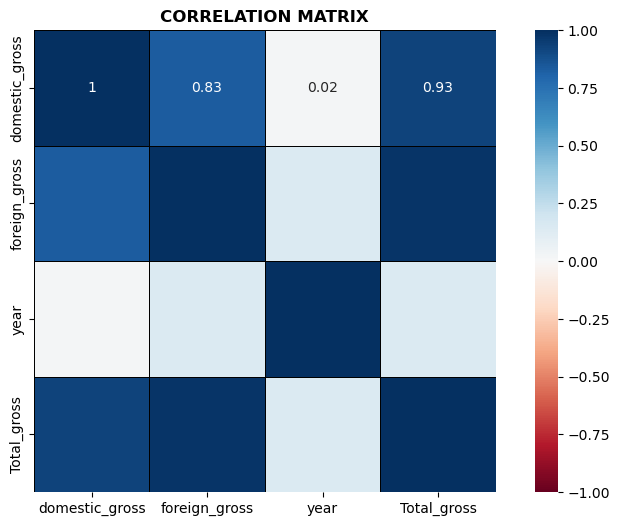

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),cmap='RdBu',vmin=-1,vmax=1,annot=True,center=0,linewidth=0.5,linecolor='black',square=True)
plt.title('CORRELATION MATRIX',fontweight='bold')
plt.show()

- **The strong positive correlation between the domestic gross and Total gross shows that movies that were produces locally also did well internationally.**

In [23]:
df=df.sort_values(by='Total_gross', ascending=False).head(15)

In [24]:
df

,title,domestic_gross,foreign_gross,year,Total_gross
727,Marvel's The Avengers,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,409000000.0,805800000.0,2013,1.214800e+09


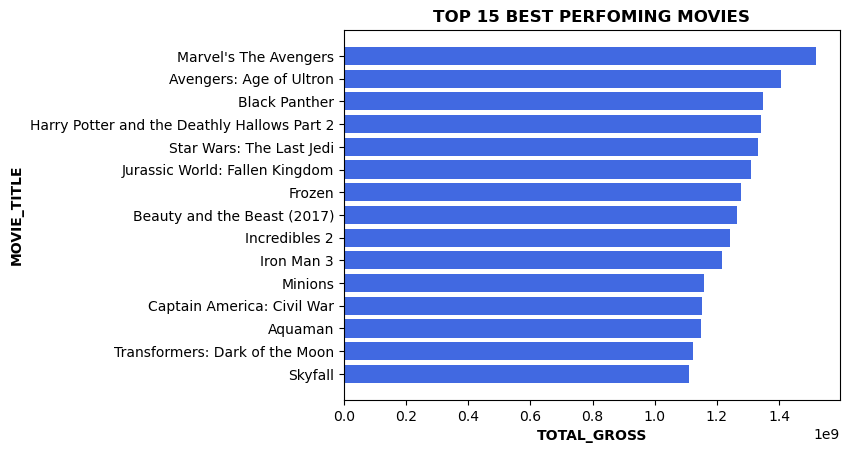

In [25]:
fig,ax=plt.subplots()
ax.barh(df['title'],df['Total_gross'],color='royalblue')
ax.set_title('TOP 15 BEST PERFOMING MOVIES',fontweight='bold')
ax.set_xlabel('TOTAL_GROSS',fontweight='bold')
ax.set_ylabel('MOVIE_TITLE',fontweight='bold')
ax.invert_yaxis()
plt.show()

In [26]:
path=r"C:\Users\hp\Desktop\PHASE TWO PROJECT\P2_datasets\df.csv" #This code saves the cleaned dataframe to a designated path in my computer files.
df.to_csv(path,index=False)
print(f"file saved to; {path}")

file saved to; C:\Users\hp\Desktop\PHASE TWO PROJECT\P2_datasets\df.csv


**This bar chart shows that Action and superhero movies generated the highest income.**

## **(a)<u>Preparation of second dataset.(tmdb.movies.csv.gz)<u>**

In [27]:
df2=pd.read_csv(r"C:\Users\hp\Downloads\tmdb.movies.csv.gz")       #loads the dataset
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [28]:
df2.describe() #Gives a statistical summary of the dataframe.

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [29]:
df2.info() #Gives an overview of the dataframes structure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [30]:
df2.duplicated().sum()

0

In [31]:
df2.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [32]:
df2.shape #confirms number of rows and columns respectively.

(26517, 10)

In [33]:
df2.drop(['Unnamed: 0','genre_ids','original_title','id'],axis=1,inplace=True)
df2

,original_language,popularity,release_date,title,vote_average,vote_count
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,28.005,1995-11-22,Toy Story,7.9,10174
4,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...
26512,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,en,0.600,2018-10-01,The Last One,0.0,1
26515,en,0.600,2018-06-22,Trailer Made,0.0,1


## **(b)<u>Data Analysis.(tmdb.movies.csv.gz)<u>**

In [34]:
df2.corr(numeric_only=True)  #Gives correlation of all numeric fields in the dataframe.

,popularity,vote_average,vote_count
popularity,1.000000,0.065273,0.694849
vote_average,0.065273,1.000000,0.086370
vote_count,0.694849,0.086370,1.000000


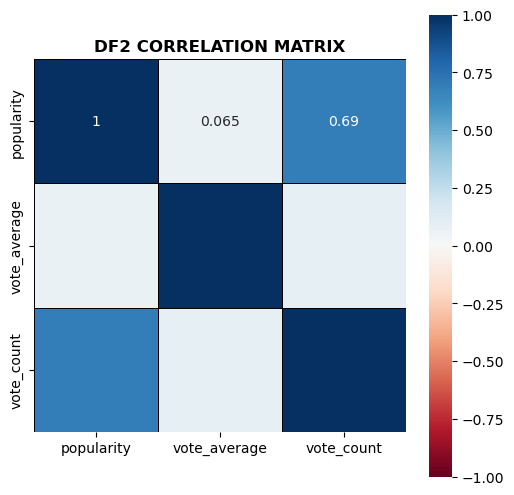

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(numeric_only=True),cmap='RdBu',center=0,vmin=-1,vmax=1,linewidth=0.5,linecolor='black',square=True,annot=True)
plt.title('DF2 CORRELATION MATRIX',fontweight='bold')
plt.show()

- **The strong positive correlation between vote_count and popularity indicate a strong linear relationship meaning movies with more votecounts were more popular.**

In [36]:
print(df2['release_date'].dtype) #This is an anomaly as 'release_date' should be data type 'datetime'

object


In [37]:
df2['release_date']=pd.to_datetime(df2['release_date'],format='%Y-%m-%d') #converts to 'datetime' data type.

In [38]:
print(df2['release_date'].dtype)

datetime64[ns]


In [39]:
popular_movies=df2.sort_values(by='popularity', ascending=False).head(15)
popular_movies

,original_language,popularity,release_date,title,vote_average,vote_count
23811,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,en,78.123,2014-10-24,John Wick,7.2,10081
23812,en,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,en,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,en,50.289,2012-05-04,The Avengers,7.6,19673
11021,en,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,en,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,en,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,en,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,en,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


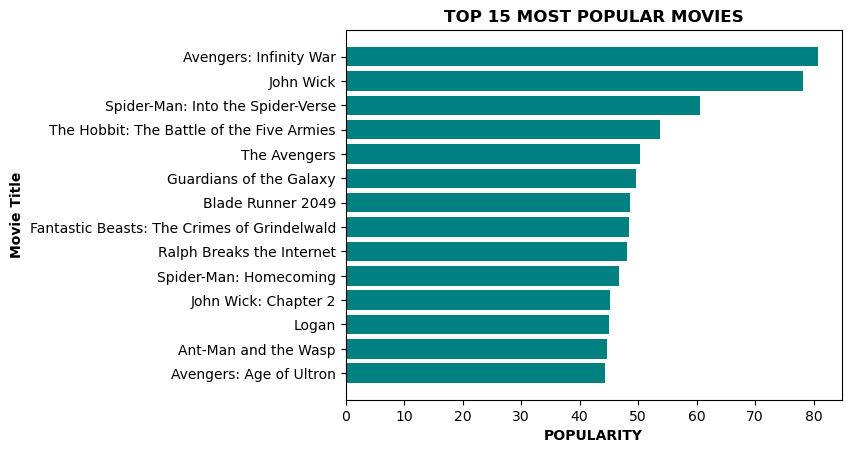

In [40]:
fig,ax=plt.subplots()
ax.barh(popular_movies['title'],popular_movies['popularity'],color='teal')
ax.set_ylabel('Movie Title',fontweight='bold')
ax.set_xlabel('POPULARITY',fontweight='bold')
ax.set_title('TOP 15 MOST POPULAR MOVIES',fontweight='bold')
ax.invert_yaxis()
plt.show()

- **This bar chart also proves that Action and superhero films perfoms the best at the box office based on their popularity.**

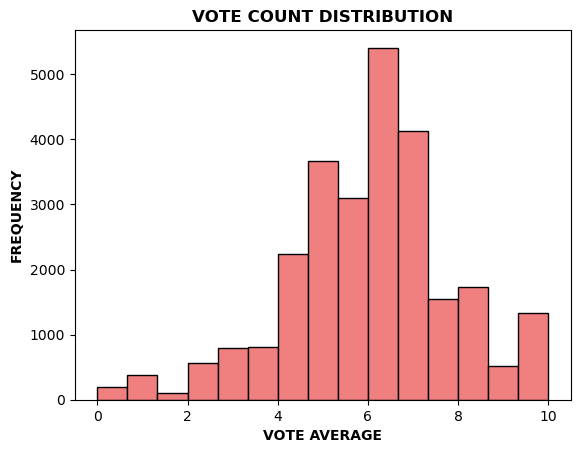

In [41]:
fig,ax=plt.subplots()
ax.hist(df2['vote_average'],bins=15,color='lightcoral',edgecolor='black')
ax.set_xlabel('VOTE AVERAGE',fontweight='bold')
ax.set_ylabel('FREQUENCY',fontweight='bold')
ax.set_title('VOTE COUNT DISTRIBUTION',fontweight='bold')
plt.show()


- **Above vote_count histogram shows a normal distribution meaning most movies were fairly rated with a few of them having extremely good or bad rating.**

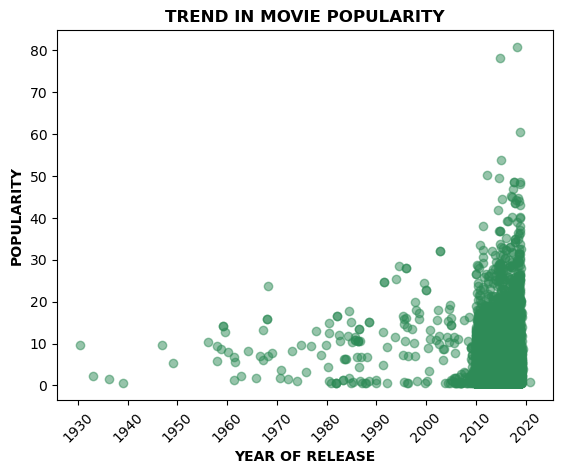

In [42]:
fig,ax=plt.subplots()
ax.scatter(df2['release_date'],df2['popularity'],color='seagreen',alpha=0.5)
ax.set_xlabel('YEAR OF RELEASE',fontweight='bold')
ax.set_ylabel('POPULARITY',fontweight='bold')
ax.set_title('TREND IN MOVIE POPULARITY',fontweight='bold')
ax.tick_params(axis='x',rotation=45)
plt.show()

- **There is a sharp increase in movie production from 2005 to around 2022**
- **Extremely popular movies were produced in 2010 to 2020, could be blockbusters**

In [43]:
path=r"C:\Users\hp\Desktop\PHASE TWO PROJECT\P2_datasets\popular_movies.csv"
popular_movies.to_csv(path,index=False)
print(f"file saved to; {path}")

file saved to; C:\Users\hp\Desktop\PHASE TWO PROJECT\P2_datasets\popular_movies.csv


## (a).**<u>DATABASE PREPARATION(im.db.zip)<u>**

In [44]:
with zipfile.ZipFile(r"C:\Users\hp\Downloads\im.db.zip", 'r') as zip_ref:    #This opens and extracts the zipped files in the archive.
    zip_ref.extractall()

In [45]:
with zipfile.ZipFile(r"C:\Users\hp\Downloads\im.db.zip", 'r') as zip_ref:    #This checks which files were extracted.
    print(zip_ref.namelist())

['im.db']


In [46]:
#['im.db']- in the zipped file was this database.
import sqlite3
conn=sqlite3.connect('im.db')  #This connects sqlite3 module to the database.('im.db')
cur=conn.cursor()              #This cursor object executes commands and fetches results from the database.

In [47]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';",conn)      #This pulls all table names in the database.

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### (i). **<u>Table_one preparation(movie_basics)<u>**

In [48]:
df=pd.read_sql_query('SELECT* FROM movie_basics;',conn) #This retrieves the table from the database.
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [49]:
df.duplicated().sum() #checks for duplicates in the table.

0

In [50]:
df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [51]:
df=df.drop(['original_title','runtime_minutes'],axis=1) #Drops 'unnecessary' columns. 
df

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,None


In [52]:
df['primary_title']=df['primary_title'].str.strip() #This removes the leading and trailing whitespaces from the respective column.

In [53]:
df['genres']=df['genres'].str.strip()

In [54]:
df['genres']=df['genres'].fillna('Unknown') #Filling nulls instead of dropping them increases accuracy and precision of results.

In [55]:
df.isna().sum()

movie_id         0
primary_title    0
start_year       0
genres           0
dtype: int64

### (ii). **<u>Table two preparation(movie_ratings)<u>**

In [56]:
df=pd.read_sql_query("SELECT* FROM movie_ratings;",conn)
df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [57]:
df.duplicated().sum()

0

In [58]:
df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

## **(b) <u>Data Analysis<u>**

In [59]:
joined_df=pd.read_sql_query("""SELECT mb.movie_id,mb.primary_title,mb.start_year,mb.genres,mr.averagerating,mr.numvotes
                            FROM movie_basics AS mb INNER JOIN movie_ratings AS mr ON mb.movie_id=mr.movie_id;""",conn)
joined_df.head()

,movie_id,primary_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119


In [60]:
joined_df.describe()

,start_year,averagerating,numvotes
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [61]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   start_year     73856 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73856 non-null  float64
 5   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ MB


In [62]:
joined_df[joined_df['genres'].isna()]

,movie_id,primary_title,start_year,genres,averagerating,numvotes
18,tt0253093,Gangavataran,2018,None,6.6,8
29,tt0306058,Second Coming,2012,None,5.5,20
33,tt0326592,The Overnight,2010,None,7.5,24
37,tt0330811,Regret Not Speaking,2011,None,6.2,10
38,tt0330987,"Tiden är en dröm, del 2",2014,None,6.3,6
...,...,...,...,...,...,...
73644,tt9742106,The Cat in Their Arms,2018,None,4.5,8
73752,tt9828428,Anjali CBI,2019,None,7.6,20
73798,tt9866736,Rise: Ini Kalilah,2018,None,5.8,11
73805,tt9876160,Koridor bessmertiya,2019,None,5.4,45


In [63]:
joined_df['genres']=joined_df['genres'].fillna('Unknown').replace('None','Unknown') #This 

In [64]:
joined_df['genres'].isna().sum()

0

In [65]:
joined_df[joined_df['genres'].isna()] #confirms no null values in the joined dataframe.

,movie_id,primary_title,start_year,genres,averagerating,numvotes


In [66]:
joined_df=joined_df.sort_values(by='averagerating',ascending=False).head(20)

In [67]:
joined_df.corr(numeric_only=True)

,start_year,averagerating,numvotes
start_year,1.000000,-0.357224,0.203595
averagerating,-0.357224,1.000000,-0.477779
numvotes,0.203595,-0.477779,1.000000


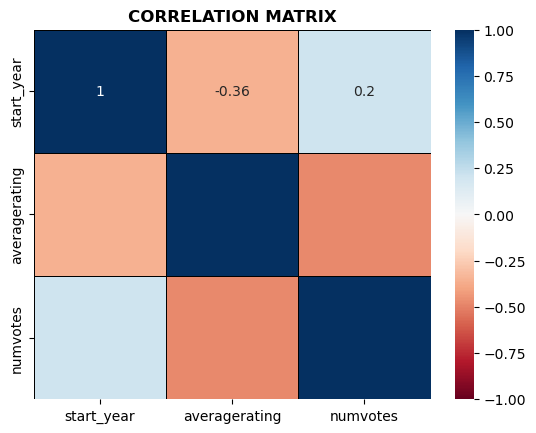

In [68]:
sns.heatmap(joined_df.corr(numeric_only=True),center=0,vmin=-1,vmax=1,cmap='RdBu',annot=True,linewidth=0.5,linecolor='black')
plt.title('CORRELATION MATRIX',fontweight='bold')
plt.show()

- **The weak linear correlation displayed by the heatmap indicate that no linear relationship exist between the variables above and should therefore be treated as independent variables during analysis.**

In [69]:
top_movies=joined_df.sort_values(by='averagerating',ascending=False).head(20)

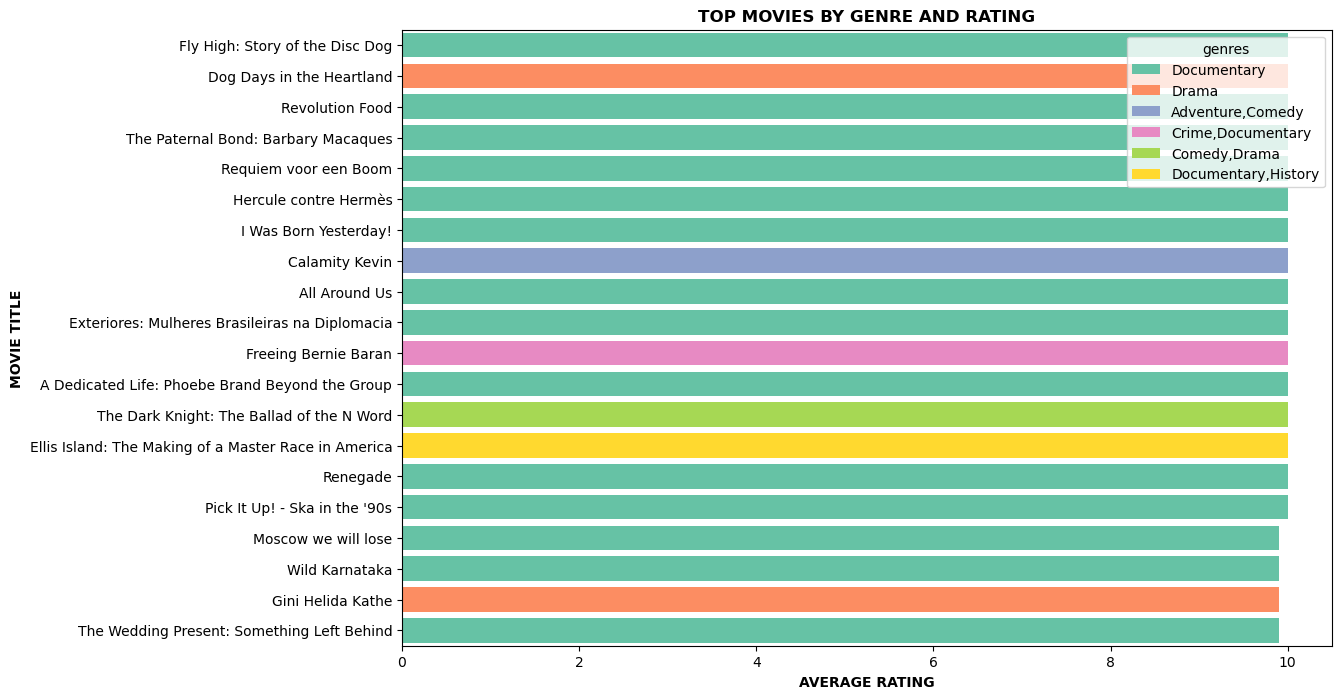

In [70]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(data=top_movies,x='averagerating',y='primary_title',hue='genres',palette='Set2',saturation=5,dodge=False)
ax.set_xlabel('AVERAGE RATING',fontweight='bold')
ax.set_ylabel('MOVIE TITLE',fontweight='bold')
ax.set_title('TOP MOVIES BY GENRE AND RATING',fontweight='bold')
plt.show()


- **This bar chart shows that documentaries also did well at the box office.**
- **Documentary based films appear more compared to other genres on the top list of best rated movies.**
- **Drama genre produced two movies that were most likely blockbusters(did well) based on their average rating.**

In [71]:
path=r"C:\Users\hp\Desktop\PHASE TWO PROJECT\P2_datasets\joined_df.csv"
joined_df.to_csv(path,index=False)
print(f"file saved to; {path}")

file saved to; C:\Users\hp\Desktop\PHASE TWO PROJECT\P2_datasets\joined_df.csv


## **4. <u>BUSINESS RECOMMENDATIONS.<u>**

1. The company should invest more in the following genres as they generate more income for a long period of time:
   - **Action and superhero films**
   - **Documentaries**
2. The company should focus more on films that are relatable internationally. This is evident as top perfoming movies do well internationally than domestically, in terms of net gross.
3.  The company can invest in superhero merchandise as an extra income source mostly targeting children.